Import libraries


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [67]:
data=pd.read_csv('/content/NLP_traindata.csv')

In [68]:
data.head()#view the data

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [69]:
data.tweet[:2]

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
Name: tweet, dtype: object

Preprocessing

Most common problem 
1. Remove punctuation 
2. Replace short words 
3. Replace mutliple space with single space
4. Convert text to lower case
5. Lemmatization

In [70]:
#Remove punctuation
def preprocess_word(word):
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    word = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', word)
    # Replace @handle with the word USER_MENTION
    word = re.sub(r'@[\S]+', 'USERMENTION', word)
    # Replaces #hashtag with hashtag
    word = re.sub(r'#(\S+)', r' \1 ', word)
    # Remove RT (retweet)
    word = re.sub(r'\brt\b', '', word)
    # Replace 2+ dots with space
    word = re.sub(r'\.{2,}', ' ', word)
    # Replace multiple spaces with a single space
    word = re.sub(r'\s+', ' ', word)
    #replace ^with space
    word = re.sub(r'\^', '', word)
    # Remove punctuation
    return word 

In [71]:
data['tweet_processed']=[preprocess_word(word) for word in data['tweet']]

In [72]:
data.head()

,id,label,tweet,tweet_processed
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test URL android apps b...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to ...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? talk makememories ...
3,4,0,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way ...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple wont even talk to ...


In [73]:
data.head()

,id,label,tweet,tweet_processed
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test URL android apps b...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to ...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? talk makememories ...
3,4,0,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way ...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple wont even talk to ...


we can see special charcters are not removed from the above preprocessed tweet, let's try to remove them

In [74]:
data['tweet_processed']=data['tweet_processed'].str.replace('[^a-zA-Z0-9]',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [75]:
#remove words less then 2letters
data['tweet_processed'] = data['tweet_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [76]:
#make text in lower
data['tweet_processed'] = [review.lower() for review in data['tweet_processed']]

In [77]:
data.head()

,id,label,tweet,tweet_processed
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test url android apps be...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this would you talk makememories unplug r...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george was made that way iphone cut...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple wont even talk abou...


In [78]:
del data['tweet']

In [91]:
del data['id']

In [79]:
data.to_csv("processed_tweet.csv")

Remove stop words

In [65]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
stop_words = stopwords.words('english')

In [86]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
#there are few words in our tweet which do not add much value let us remove those
add_words=['url','usermention']

In [83]:
stop_words.extend(add_words)

In [84]:
# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
data['tweet_processed'] = [remove_stopwords(r) for r in data['tweet_processed']]

In [85]:
data.head()

,id,label,tweet_processed
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would talk makememories unplug relax ipho...
3,4,0,wired know george made way iphone cute daventr...
4,5,1,amazing service apple wont even talk question ...


Lemmatization

In [87]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


data['tweet_processed'] = data['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [88]:
#ploting most frequent positive review words

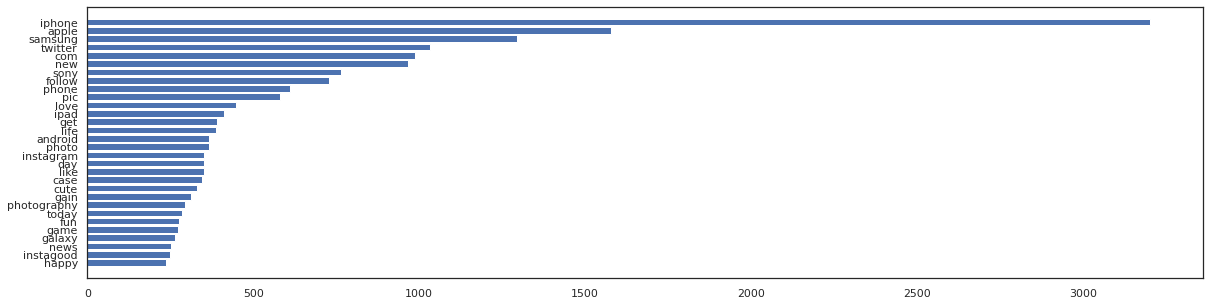

In [89]:
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = data.loc[data['label'] == 0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['tweet_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

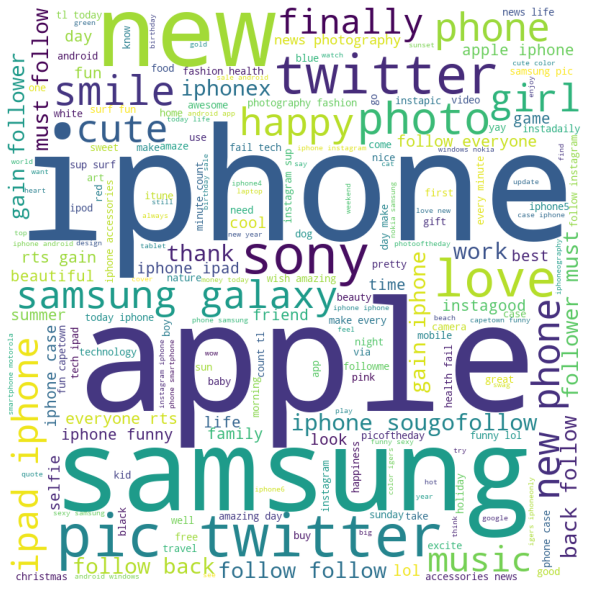

In [90]:
from wordcloud import WordCloud
word_cloud_df = data.loc[data['label'] == 0,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Bag of words

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(data.tweet_processed).toarray()
y = data.label.map({0: 1, 1: 0}).values
featureNames = tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Build the model

In [93]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X,y)

y_pred = dt.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [95]:
from sklearn.metrics import confusion_matrix, f1_score
accuracy = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[2026    0]
 [   8 5886]]
The model accuracy is 0.9993208828522921


In [102]:
test_data=pd.read_csv('/content/NLP_testdata.csv')

In [103]:
test_data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


preprocess the tweet

In [105]:
test_data['tweet_processed']=[preprocess_word(word) for word in test_data['tweet']]

In [106]:
test_data['tweet_processed']=test_data['tweet_processed'].str.replace('[^a-zA-Z0-9]',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [110]:
#remove words less then 2letters
test_data['tweet_processed'] = test_data['tweet_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [111]:
#make text in lower
test_data['tweet_processed'] = [review.lower() for review in test_data['tweet_processed']]

In [120]:
del test_data['tweet']

In [112]:
# Removing stopwords
test_data['tweet_processed'] = [remove_stopwords(r) for r in test_data['tweet_processed']]

In [113]:
#lemmatization
test_data['tweet_processed'] = test_data['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

In [115]:
x_test=tfidf.fit_transform(test_data.tweet_processed).toarray()

In [116]:
test_pred=dt.predict(x_test)

In [117]:
test_pred[:2]

array([0, 1])

In [118]:
test_data['pred_label']=test_pred

In [121]:
test_data.head()

,id,tweet_processed,pred_label
0,7921,hate new iphone upgrade wont let download apps...,0
1,7922,currently shit fuck pant apple imac cashmoney ...,1
2,7923,like put cdroms ipad possible yes wouldnt bloc...,1
3,7924,ipod officially dead lose picture videos 5sos ...,1
4,7925,fight itunes night want music paid,1


In [122]:
test_data.to_csv('testData_predicted.csv')